In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import imutils


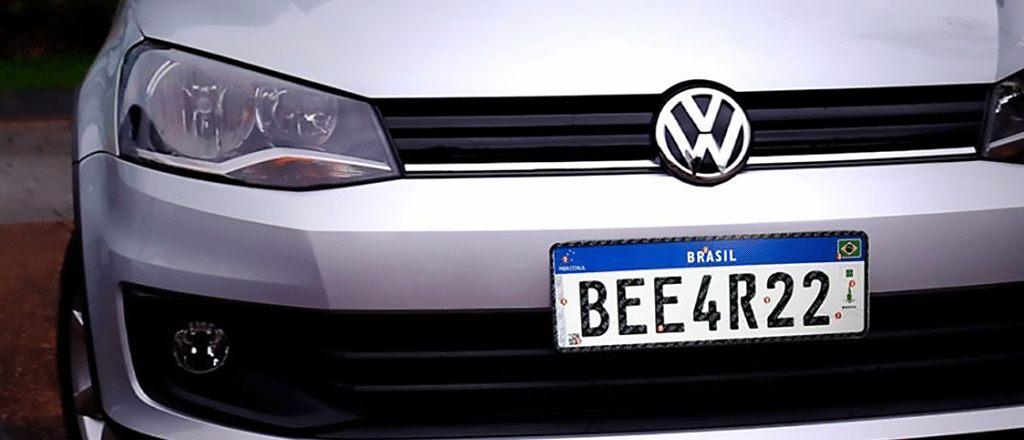

In [2]:
image = cv2.imread("/content/placa-mercosul.png")
cv2_imshow(image)


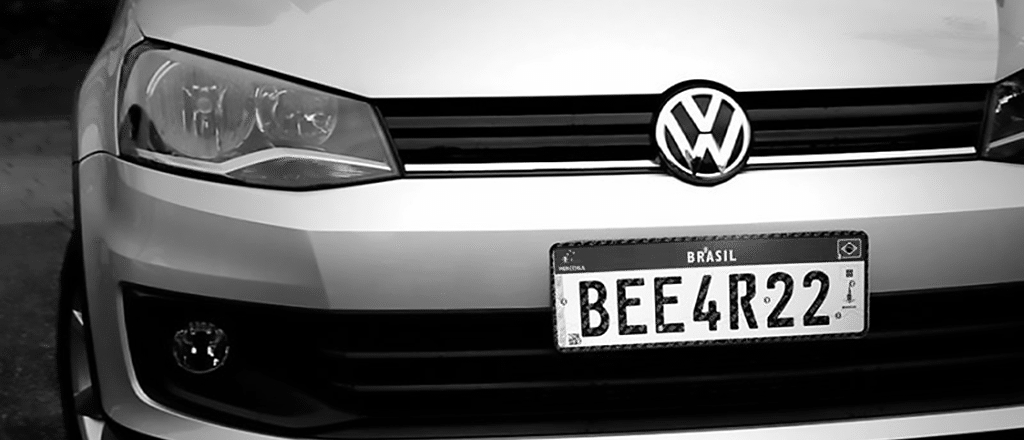

In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

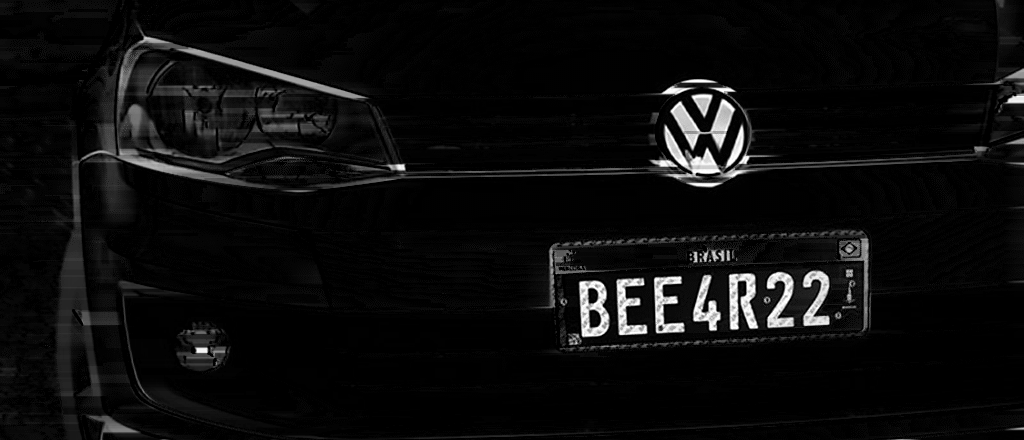

In [38]:
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,3))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(40,3))

black_hat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT, kernel)

cv2_imshow(black_hat)

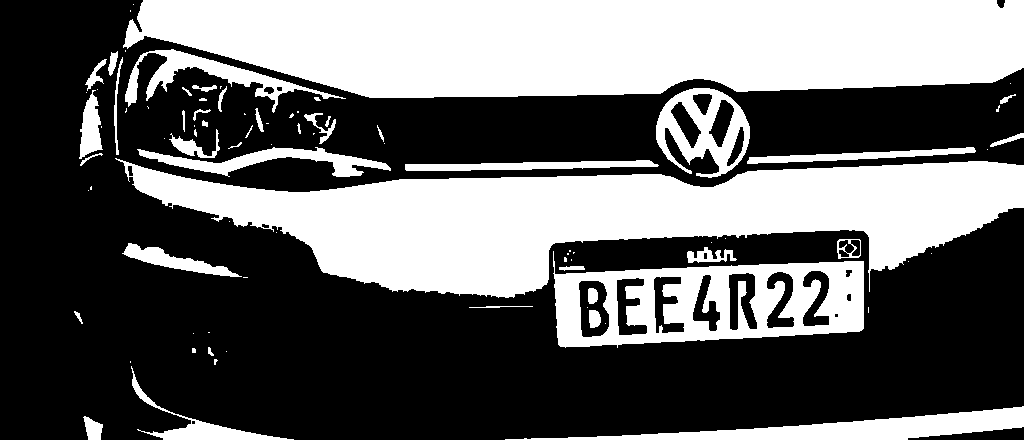

In [39]:
kernel2=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
luz = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel2)
luz=cv2.threshold(luz,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

cv2_imshow(luz)

In [40]:
gradient_x = cv2.Sobel(black_hat, ddepth=cv2.CV_32F, dx=1,dy=0,ksize=-1)
gradient_x = np.absolute(gradient_x)

In [41]:
(min, max) = (np.min(gradient_x),np.max(gradient_x))
gradient_x = 255*(gradient_x-min)/(max-min)

In [42]:
print(np.min(gradient_x))
print(np.max(gradient_x))

gradient_x=gradient_x.astype("uint8")

0.0
255.0


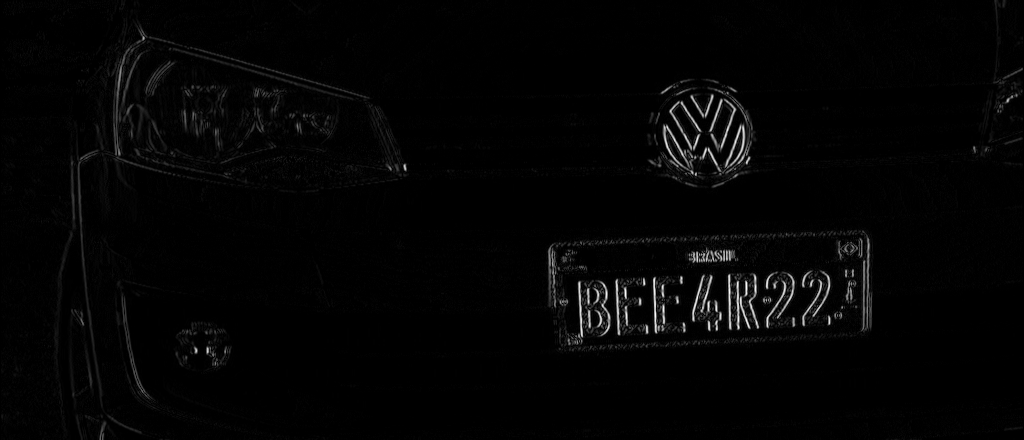

In [43]:
cv2_imshow(gradient_x)

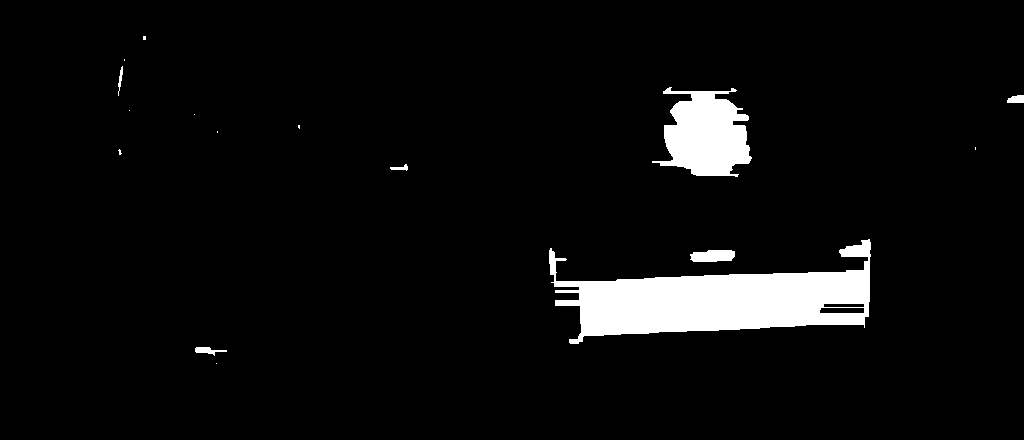

In [44]:
 gradient_x=cv2.GaussianBlur(gradient_x,(5,5),0)
 gradient_x=cv2.morphologyEx(gradient_x,cv2.MORPH_CLOSE,kernel)
 thres=cv2.threshold(gradient_x,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 cv2_imshow(thres)

In [45]:
thres = cv2.erode(thres, None, iterations=3)
thres = cv2.dilate(thres, None, iterations=6)
#cv2_imshow(thres)

In [46]:
contornos = cv2.findContours(thres.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contornos=imutils.grab_contours(contornos)
contornos=sorted(contornos, key=cv2.contourArea, reverse=True)[:5]

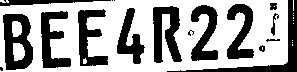

In [47]:
for c in contornos:
  (x,y,w,h) = cv2.boundingRect(c)
  proporcao=w/h

  if proporcao >= 2 and proporcao <=6:
    area_placa_identificada=gray[y:y+h,x:x+w]
    placa_recortada=cv2.threshold(area_placa_identificada,0,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)[1]
    cv2_imshow(placa_recortada)